In [1]:
import pandas as pd
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To use in feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel


# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb


from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
# To get feature selections
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    classification_report,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Make a read_parquet function to reuse


## Prob_2 / Train dataset

Source,MLOps

Label,Good (1) or Bad (0)

Train size,60000

Test size,40000

Description,"The machine learning problem aims to predict credit risk and assist financial institutions in making informed lending decisions based on various features.

Total train dataset with 60000 records and the test dataset with 40000 records."

In [2]:
import pandas as pd
import pyarrow.parquet as pq
# read_parquet
def read_parquet(path):
    data = pq.read_table(source=path).to_pandas()
    # for index in data.index:
    #     res = data.loc[index].values[0:-1]
    # print(len(result)) = 134201
    return data


path = '/content/drive/MyDrive/Colab Notebooks/MLOps_Thy/mlops_hackathon_2023/mlops_hackathon_phase_01/prob-2/raw_train.parquet'
## To be define in local file path or S3 bucket path
df = read_parquet(path)
df
df.head(5)
# df.to_csv('prob_1.csv')

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.782,V2,V8,1337.025,V4,V4,2.000,V2,V0,4.000,V2,35.689,none,V1,1.000,V2,1.000,none,yes,0
1,V3,22.765,V4,V2,1664.415,V0,V4,4.000,V1,V0,2.000,V0,23.266,none,V1,2.000,V2,1.000,none,yes,0
2,V3,7.462,V2,V3,750.653,V3,V2,4.000,V2,V0,4.000,V2,34.061,stores,V0,1.000,V2,1.000,yes,yes,0
3,V3,23.718,V4,V7,4829.002,V4,V2,4.000,V1,V0,4.000,V3,62.477,none,V1,2.000,V1,1.000,none,yes,0
4,V3,13.769,V3,V3,3559.956,V3,V4,1.000,V1,V0,4.000,V2,41.999,bank,V1,1.000,V2,1.000,yes,yes,0


# EDA prob_2

In [3]:
print(f'describe of Prob_2',df.describe())



describe of Prob_2        feature2  feature5  feature8  feature11  feature13  feature16  \
count 60000.000 60000.000 60000.000  60000.000  60000.000  60000.000   
mean     20.863  3207.836     2.954      2.837     35.641      1.422   
std      12.083  2792.931     1.121      1.105     11.261      0.606   
min       0.649 -5997.670     1.000      1.000     17.674      1.000   
25%      11.959  1388.208     2.000      2.000     27.186      1.000   
50%      18.088  2273.676     3.000      3.000     33.135      1.000   
75%      24.903  3813.300     4.000      4.000     40.959      2.000   
max      73.202 19046.986     4.000      4.000     82.179      4.000   

       feature18     label  
count  60000.000 60000.000  
mean       1.159     0.304  
std        0.366     0.460  
min        1.000     0.000  
25%        1.000     0.000  
50%        1.000     0.000  
75%        1.000     1.000  
max        2.000     1.000  


In [4]:
df.info()
#checkling NaN values
print(f'checkling NaN values:',df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   60000 non-null  object 
 1   feature2   60000 non-null  float64
 2   feature3   60000 non-null  object 
 3   feature4   60000 non-null  object 
 4   feature5   60000 non-null  float64
 5   feature6   60000 non-null  object 
 6   feature7   60000 non-null  object 
 7   feature8   60000 non-null  float64
 8   feature9   60000 non-null  object 
 9   feature10  60000 non-null  object 
 10  feature11  60000 non-null  float64
 11  feature12  60000 non-null  object 
 12  feature13  60000 non-null  float64
 13  feature14  60000 non-null  object 
 14  feature15  60000 non-null  object 
 15  feature16  60000 non-null  float64
 16  feature17  60000 non-null  object 
 17  feature18  60000 non-null  float64
 18  feature19  60000 non-null  object 
 19  feature20  60000 non-null  object 
 20  label 

No missing data

**Unique values for Category columns and Unique values for Numberic columns**

In [5]:
print(f'Unique values of Object values',df.select_dtypes(include="object").nunique())
print(f'Unique values of Numberic values',df.select_dtypes(exclude="object").nunique())

# let's view the statistical summary of the categorical columns in the data
print(df.describe(include="object").T)

Unique values of Object values feature1      4
feature3      5
feature4     11
feature6      5
feature7      5
feature9      5
feature10     3
feature12     4
feature14     3
feature15     3
feature17     4
feature19     2
feature20     2
dtype: int64
Unique values of Numberic values feature2     59889
feature5     60000
feature8         4
feature11        4
feature13    59952
feature16        4
feature18        2
label            2
dtype: int64
           count unique   top   freq
feature1   60000      4    V3  23659
feature3   60000      5    V2  31782
feature4   60000     11    V3  16634
feature6   60000      5    V0  35846
feature7   60000      5    V2  20178
feature9   60000      5    V2  32919
feature10  60000      3    V0  54407
feature12  60000      4    V2  19540
feature14  60000      3  none  48517
feature15  60000      3    V1  42275
feature17  60000      4    V2  37390
feature19  60000      2  none  35672
feature20  60000      2   yes  57645


# Distribution of category columns statistics and label column statistic


In [6]:
# Below function prints unique value counts and percentages for the category/object type variables
import numpy as np

def category_unique_value():
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),                          # Count
                df[cat_cols].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()
# feature1 therefore can be 'jobs' column
# feature2 therefore can be 'job_sector' column

Unique values and corresponding data counts for feature: feature1
------------------------------------------------------------------------------------------
    Count  Percentage
V3  23659      39.432
V0  16355      27.258
V1  16130      26.883
V2   3856       6.427
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature3
------------------------------------------------------------------------------------------
    Count  Percentage
V2  31782      52.970
V4  17474      29.123
V3   5317       8.862
V1   2936       4.893
V0   2491       4.152
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature4
------------------------------------------------------------------------------------------
     Count  Percentage
V3   16634      27.723
V0   14005      23.342
V2   10761      17.935
V1    6183   

In [7]:
def num_unique_value():
    for num_cols in (
        df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + num_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[num_cols].value_counts(),                          # Count
                df[num_cols].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

num_unique_value()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
23.640      1       0.002
25.297      1       0.002
39.881      1       0.002
11.522      1       0.002
25.363      1       0.002
19.729      1       0.002
24.512      1       0.002
8.113       1       0.002
25.246      1       0.002
11.870      1       0.002
25.093      1       0.002
19.296      1       0.002
6.213       1       0.002
15.091      1       0.002
11.448      1       0.002
21.914      1       0.002
41.887      1       0.002
12.504      1       0.002
5.724       1       0.002
14.271      1       0.002
39.425      1       0.002
15.516      1       0.002
46.930      1       0.002
24.688      1       0.002
12.184      1       0.002
24.512      1       0.002
45.843      1       0.002
8.640       1       0.002
48.682      1       0.002
23.202      1       0.002
12.537      1       0.002
17.578      1       0.002
12.869      1       0.002
24.577      1       0.002
24.172      1       0.002
29.793      1       0.002
39.666 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
def num_unique_value():
    for num_cols in (
        df['label'].unique()
    ):
        print("Unique values and corresponding data counts for label: ")
        print("-" * 90)
        df_temp = pd.concat(
            [
                df['label'].value_counts(),                          # Count
                df['label'].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

num_unique_value()

Unique values and corresponding data counts for label: 
------------------------------------------------------------------------------------------
   Count  Percentage
0  41785      69.642
1  18215      30.358
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for label: 
------------------------------------------------------------------------------------------
   Count  Percentage
0  41785      69.642
1  18215      30.358
------------------------------------------------------------------------------------------


# Visualize The Correlation Between Dependent And Independent Dependent Features

From the 2 heatmap graphs below,the most important features to understand fraudulent transaction, are: Feature 5, Feature 2.

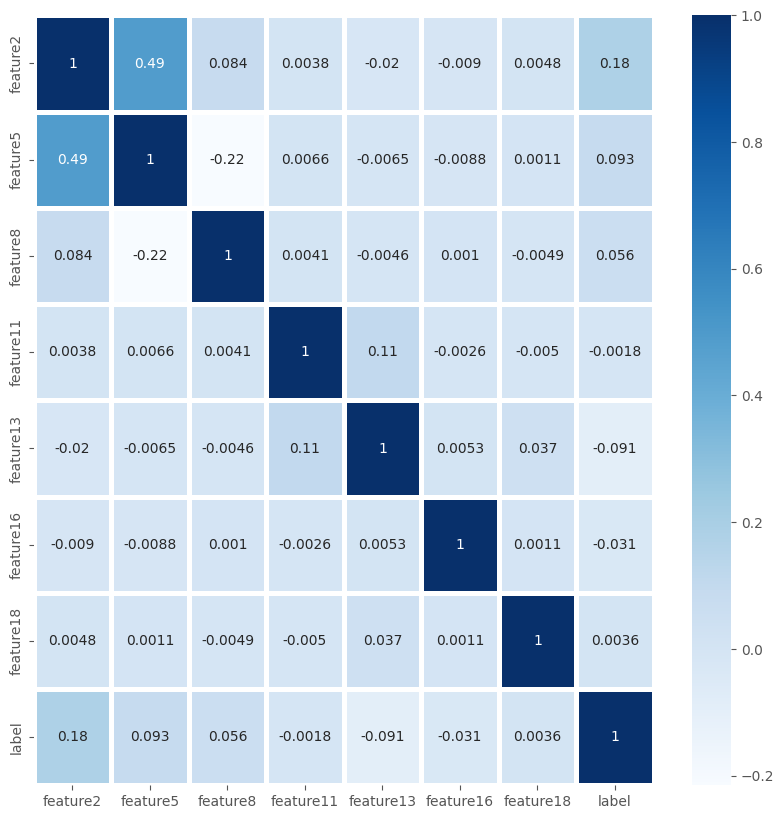

In [9]:
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer


corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

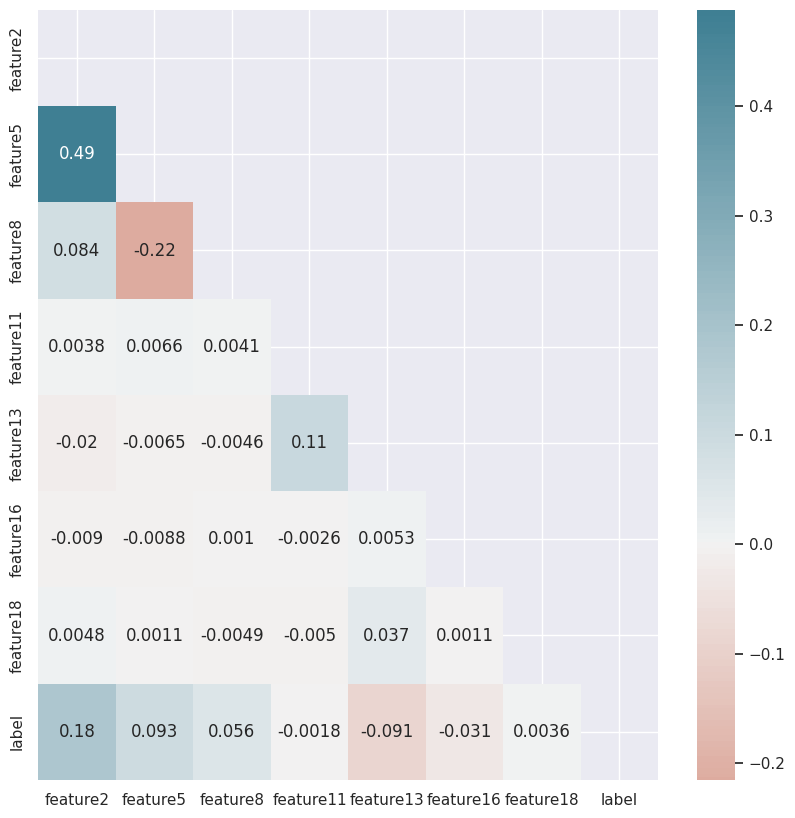

In [10]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={"figure.figsize": (10, 10)})

sns.heatmap(
    df.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

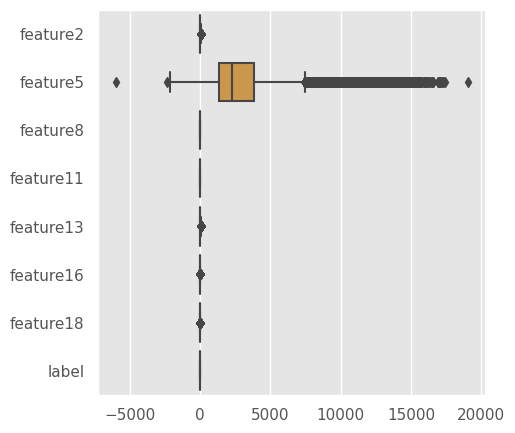

In [11]:
# This grapth show the distribution of each numberic features to find outliers values
from mlxtend.preprocessing import standardize
import seaborn as sns
from matplotlib import pyplot as plt
numeric_columns = df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.show()

Feature 5 has top outliers distribution but also importance to label result. Feature5 AND 8 are considered to be affective to label result.

# Feature Engineering
- Data type conversions: We need to convert the data type of the category variables (Feature 1 and 2) from object to category

In [17]:
category_columns= df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
df[category_columns] = df[category_columns].astype("category")


## Data Preprocessing

Pre-processing steps:

- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets
Standardize feature names
- Missing Value/Incorrect Value treatment
- Encoding
- Scaling/Outlier treatment

**Building data transformer functions and classes**

Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

In [5]:

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Splitting the dataset into dependent and independent variable sets
X,y = df.drop(columns=["label"]),  df["label"]


In [6]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (36000, 20) 

Validation Data Shape: 

 (12000, 20) 

Testing Data Shape: 

 (12000, 20)


In [7]:
# %%file data_preprocessing.py
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_


# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_



# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_


# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_

# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


if __name__ == "__main__":
  # To Standardize feature names
  feature_name_standardizer = FeatureNamesStandardizer()

  X_train = feature_name_standardizer.fit_transform(X_train)
  X_val = feature_name_standardizer.transform(X_val)
  X_test = feature_name_standardizer.transform(X_test)


  # To impute categorical Nulls to Unknown
  cat_columns = X_train.select_dtypes(include="category").columns.tolist()
  imputer = FillUnknown()

  X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
  X_val[cat_columns] = imputer.transform(X_val[cat_columns])
  X_test[cat_columns] = imputer.transform(X_test[cat_columns])

  # To encode the data
  one_hot = PandasOneHot()

  X_train = one_hot.fit_transform(X_train)
  X_val = one_hot.transform(X_val)
  X_test = one_hot.transform(X_test)


  # Scale the numerical columns
  robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
  num_columns = [
          "feature2",
          "feature5",
          "feature13",
          "feature18"
      ]

  X_train[num_columns] = pd.DataFrame(
      robust_scaler.fit_transform(X_train[num_columns]),
      columns=num_columns,
      index=X_train.index,
  )
  X_val[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
  )
  X_test[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_test[num_columns]),
      columns=num_columns,
      index=X_test.index,
  )


In [8]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (36000, 50) 

Validation Data Shape: 

 (12000, 50) 

Testing Data Shape: 

 (12000, 50)


**Defining the static variables**

## Split data in Train, Validation and Test sets

In [11]:
X_train.describe()

,feature2,feature5,feature8,feature11,feature13,feature16,feature18,feature1_V1,feature1_V2,feature1_V3,feature3_V1,feature3_V2,feature3_V3,feature3_V4,feature4_V1,feature4_V10,feature4_V2,feature4_V3,feature4_V4,feature4_V5,feature4_V6,feature4_V7,feature4_V8,feature4_V9,feature6_V1,feature6_V2,feature6_V3,feature6_V4,feature7_V1,feature7_V2,feature7_V3,feature7_V4,feature9_V1,feature9_V2,feature9_V3,feature9_V4,feature10_V1,feature10_V2,feature12_V1,feature12_V2,feature12_V3,feature14_none,feature14_stores,feature15_V1,feature15_V2,feature17_V1,feature17_V2,feature17_V3,feature19_yes,feature20_yes
count,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000,36000.000
mean,1.609,1.327,2.958,2.842,2.594,1.420,1.160,0.269,0.065,0.395,0.049,0.533,0.088,0.288,0.102,0.012,0.180,0.277,0.013,0.024,0.049,0.001,0.009,0.096,0.103,0.066,0.051,0.182,0.168,0.339,0.173,0.258,0.307,0.551,0.091,0.001,0.042,0.050,0.232,0.325,0.158,0.809,0.051,0.701,0.115,0.203,0.621,0.149,0.405,0.961
std,0.933,1.157,1.122,1.101,0.822,0.610,0.367,0.444,0.247,0.489,0.217,0.499,0.284,0.453,0.303,0.109,0.384,0.448,0.114,0.154,0.216,0.036,0.095,0.295,0.304,0.248,0.220,0.386,0.374,0.473,0.378,0.437,0.461,0.497,0.288,0.035,0.200,0.219,0.422,0.468,0.365,0.393,0.220,0.458,0.319,0.402,0.485,0.356,0.491,0.194
min,0.050,-2.495,1.000,1.000,1.286,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.925,0.577,2.000,2.000,1.978,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,1.395,0.940,3.000,3.000,2.408,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
75%,1.925,1.577,4.000,4.000,2.978,2.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000
max,5.607,7.924,4.000,4.000,5.980,4.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Checking the ratio of labels in the target column for each of the data segments**

In [12]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.696
1   0.304
Name: label, dtype: float64


Validation: 
 0   0.696
1   0.304
Name: label, dtype: float64


Test: 
 0   0.696
1   0.304
Name: label, dtype: float64


# Feature Selection


We apply Feature Selection with some models we see have high metric scores: AdaBoost, XGBClassifier, Light GBM

In [13]:

X.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
0,V1,4.782,V2,V8,1337.025,V4,V4,2.000,V2,V0,4.000,V2,35.689,none,V1,1.000,V2,1.000,none,yes
1,V3,22.765,V4,V2,1664.415,V0,V4,4.000,V1,V0,2.000,V0,23.266,none,V1,2.000,V2,1.000,none,yes
2,V3,7.462,V2,V3,750.653,V3,V2,4.000,V2,V0,4.000,V2,34.061,stores,V0,1.000,V2,1.000,yes,yes


In [14]:
X_train.head(3)

,feature2,feature5,feature8,feature11,feature13,feature16,feature18,feature1_V1,feature1_V2,feature1_V3,feature3_V1,feature3_V2,feature3_V3,feature3_V4,feature4_V1,feature4_V10,feature4_V2,feature4_V3,feature4_V4,feature4_V5,feature4_V6,feature4_V7,feature4_V8,feature4_V9,feature6_V1,feature6_V2,feature6_V3,feature6_V4,feature7_V1,feature7_V2,feature7_V3,feature7_V4,feature9_V1,feature9_V2,feature9_V3,feature9_V4,feature10_V1,feature10_V2,feature12_V1,feature12_V2,feature12_V3,feature14_none,feature14_stores,feature15_V1,feature15_V2,feature17_V1,feature17_V2,feature17_V3,feature19_yes,feature20_yes
29626,0.902,0.948,4.000,2.000,1.740,1.000,1.000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
13599,1.477,0.621,2.000,1.000,1.894,1.000,2.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1
18157,1.415,0.913,4.000,2.000,2.852,1.000,1.000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1


So we finished Encoding category columns, Scaling numberic columns. Next we will do feature selection to see which features have most impact on some models and label results.

## Oversampling and Undersampling train data using SMOTE, RandomUnderSampler to deal with imbalance dataset.

In [16]:
def oversampling_data():
  sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
  )  # Synthetic Minority Over Sampling Technique
  return sm

X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
print("Before UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before UpSampling, counts of label 'Yes-fraud': 10929
Before UpSampling, counts of label 'No-nofraud': 25071 

After UpSampling, counts of label 'Yes-fraud': 25071
After UpSampling, counts of label 'No-nofraud': 25071 

After UpSampling, the shape of train_X: (50142, 50)
After UpSampling, the shape of train_y: (50142,) 



In [15]:
def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus


X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before Under Sampling, counts of label 'Yes': 10929
Before Under Sampling, counts of label 'No': 25071 

After Under Sampling, counts of label 'Yes': 10929
After Under Sampling, counts of label 'No': 10929 

After Under Sampling, the shape of train_X: (21858, 50)
After Under Sampling, the shape of train_y: (21858,) 



## Feature Selection with Undersample data

Now we use X_train_un, y_train_un to apply Feature Selection.

In [26]:
from sklearn.svm import LinearSVC

# Feature Selection with X,y
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm = lgbm.fit(X,y)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

(60000, 5)
[ 93 444 140 143 408 112 260 153 133  75 117 135 335 114  98  36  61  30
  62  51]


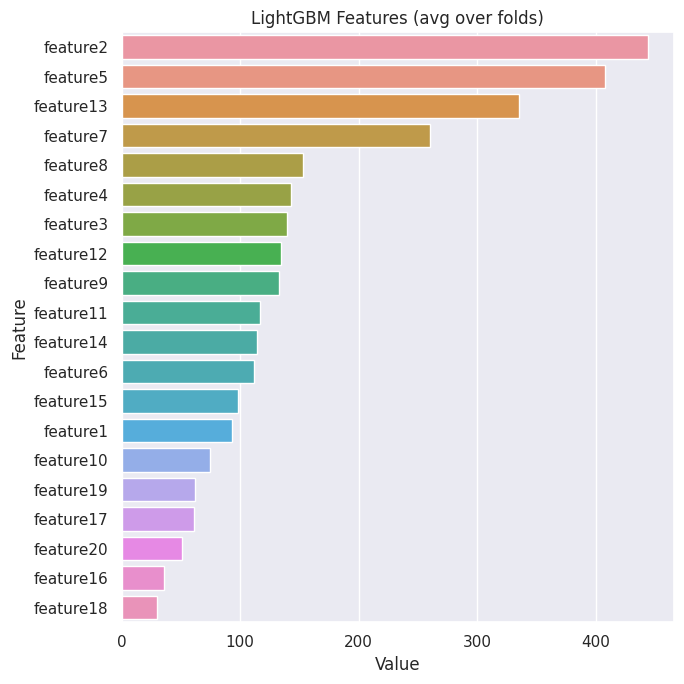

In [27]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(lgbm,X)

Feature importance with Undersample data X_train_un, y_train_un . We see that there are not much feature improtance change between 2 dataset ( (X,y) and (X_train_un, y_train_un), we still know that feature2, 5, 13, 7, 8 affect to the label result.

(21858, 10)
[377 398 108  86 414  45  37  32  41  53  40  41  29  63  43   6  24  52
   2   5  17   3  10   7  19  26  45  58  49  52  68  48  43  59  32   5
  33  44  23  62  56  69  21  60  22  12  26  35  50  50]


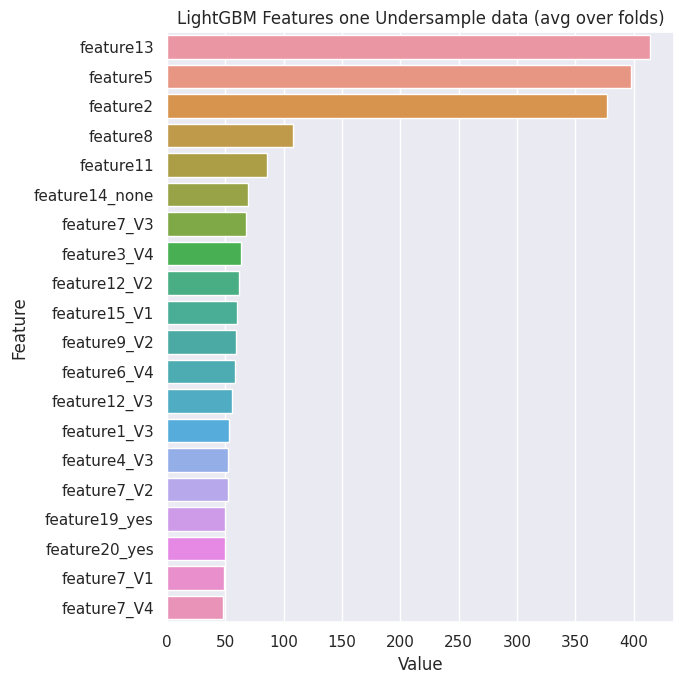

In [18]:
from sklearn.svm import LinearSVC

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm_un = lgbm.fit(X_train_un,y_train_un)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X_train_un)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features one Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances_undersample-02.png')
    plt.show()

plotImp(lgbm_un,X_train_un)

**Như vậy, feature 2,5,13,7,8 là mang yếu tố quyết định nhất đên chất lượng mô hình**

We can try other models like AdaBoostClassifier, XGBClassier but the judgement fail to less accurate, although we still see feature 13, 5, 2 are most impactful.

In [20]:
# AdaBoostClassifier
adb = AdaBoostClassifier(random_state=seed)
adb_un = adb.fit(X_train_un,y_train_un)
model = SelectFromModel(adb_un, prefit=True)
X_adb = model.transform(X_train_un)
print(X_adb.shape)


# XGBClassifier
xgb = XGBClassifier(random_state=seed, eval_metric=loss_func)
xgb_un = xgb.fit(X_train_un,y_train_un)
model = SelectFromModel(xgb_un, prefit=True)
X_xgb = model.transform(X_train_un)
print(X_xgb.shape)

(21858, 38)
(21858, 14)


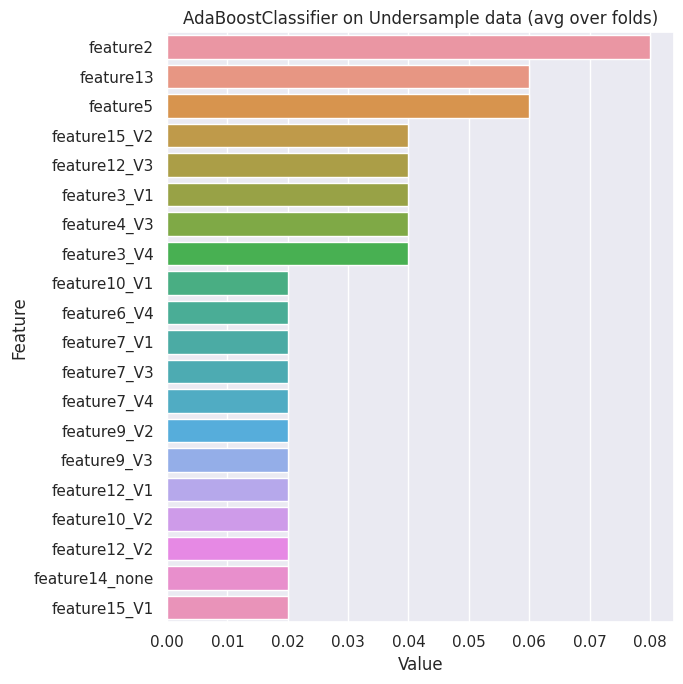

In [22]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':adb_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('AdaBoostClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('adb_importances_undersample-03.png')
    plt.show()

plotImp(adb_un,X_train_un)

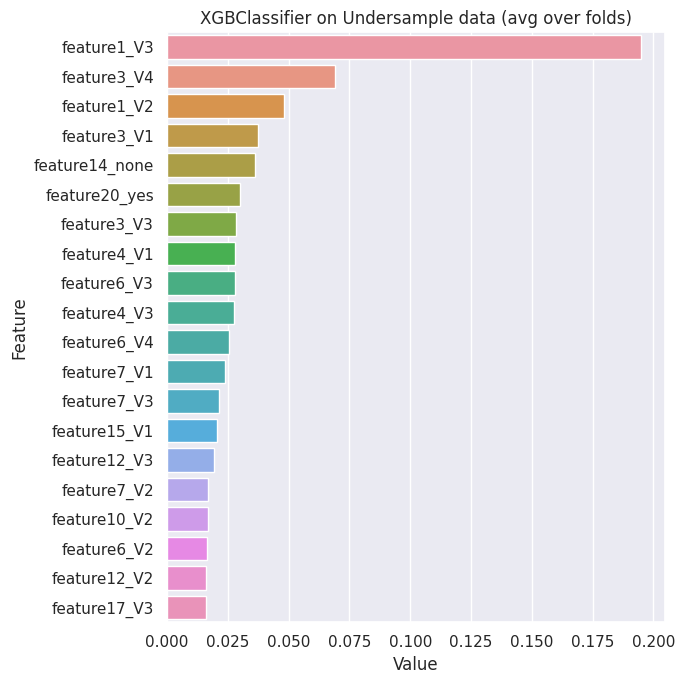

In [23]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':xgb_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('XGBClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('xgb_importances_undersample-04.png')
    plt.show()

plotImp(xgb_un,X_train_un)

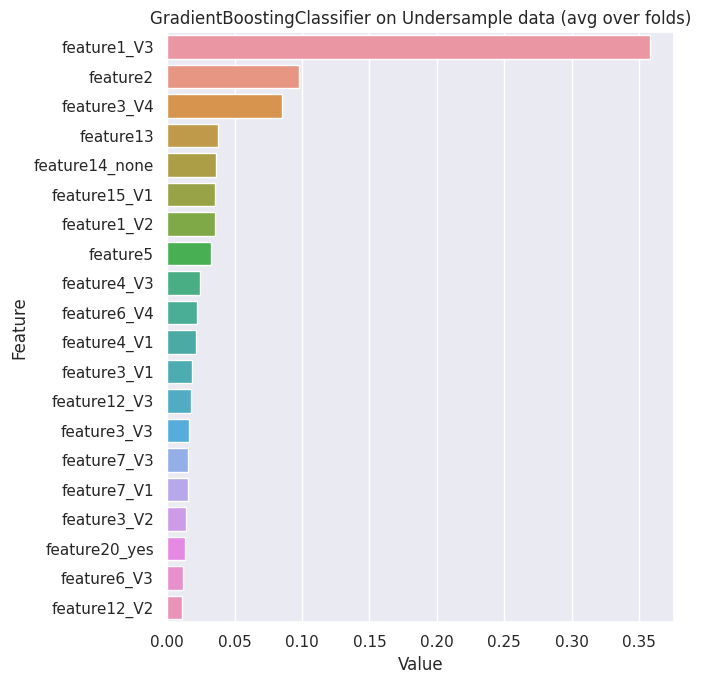

In [39]:
#GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=seed)
gbm_un = gbm.fit(X_train_un,y_train_un)
model = SelectFromModel(gbm_un, prefit=True)
X_gbm = model.transform(X_train_un)
X_gbm.shape
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':gbm_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('GradientBoostingClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('gbm_importances_undersample-05.png')
    plt.show()

plotImp(gbm_un,X_train_un)

Baay giờ ta sẽ thử xây dựng mô hình và đánh giá kết quả

In [24]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''

      _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Training ROC-AUC": results['train_roc_auc'],
              "Mean Training ROC-AUC": results['train_roc_auc'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean(),
              "Validation ROC-AUC": results['test_roc_auc'],
              "Mean Validation ROC-AUC": results['test_roc_auc'].mean()
              }


In [37]:

LGBM_result = cross_validation(lgbm, X_train, y_train)
LGBM_result

{'Training Accuracy scores': array([0.83739583, 0.8390625 , 0.84059028, 0.83881944, 0.83920139]),
 'Mean Training Accuracy': 83.90138888888889,
 'Training Precision scores': array([0.78546324, 0.79101729, 0.79026846, 0.79138838, 0.78990412]),
 'Mean Training Precision': 0.789608294219445,
 'Training Recall scores': array([0.63895242, 0.638568  , 0.64646003, 0.63696672, 0.64074116]),
 'Mean Training Recall': 0.6403376655055583,
 'Training F1 scores': array([0.70467302, 0.70666414, 0.71116703, 0.70583016, 0.70754657]),
 'Mean Training F1 Score': 0.7071761845444545,
 'Training ROC-AUC': array([0.89817229, 0.89985837, 0.90116783, 0.89995079, 0.89901742]),
 'Mean Training ROC-AUC': 0.8996333399335679,
 'Validation Accuracy scores': array([0.80972222, 0.80763889, 0.80541667, 0.80819444, 0.81013889]),
 'Mean Validation Accuracy': 80.82222222222222,
 'Validation Precision scores': array([0.73816482, 0.72768619, 0.7201346 , 0.73360418, 0.73440183]),
 'Mean Validation Precision': 0.7307983232596

In [38]:
y_pred = (lgbm.predict(X_test) > .5).astype("int32")

In [39]:
# Ket qua lan 1
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8276666666666667
[[7646  711]
 [1357 2286]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8357
           1       0.76      0.63      0.69      3643

    accuracy                           0.83     12000
   macro avg       0.81      0.77      0.78     12000
weighted avg       0.82      0.83      0.82     12000



In [30]:
# Ket qua lan 2
LGBM_result = cross_validation(lgbm, X_train, y_train)
print(LGBM_result)
y_pred = (lgbm.predict(X_test) > .5).astype("int32")

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'Training Accuracy scores': array([0.83680556, 0.83555556, 0.83711806, 0.83465278, 0.83638889]), 'Mean Training Accuracy': 83.61041666666667, 'Training Precision scores': array([0.78787016, 0.7871578 , 0.78959405, 0.78431653, 0.78649609]), 'Mean Training Precision': 0.787086926919278, 'Training Recall scores': array([0.63289113, 0.62815967, 0.63181974, 0.62804529, 0.63284914]), 'Mean Training Recall': 0.630752993454756, 'Training F1 scores': array([0.70192796, 0.69872774, 0.70195057, 0.69753557, 0.70135632]), 'Mean Training F1 Score': 0.7002996294806935, 'Training ROC-AUC': array([0.8974831 , 0.89653125, 0.89726547, 0.89655527, 0.89683022]), 'Mean Training ROC-AUC': 0.8969330611163586, 'Validation Accuracy scores': array([0.80972222, 0.81111111, 0.80638889, 0.80916667, 0.81402778]), 'Mean Validation Accuracy': 81.00833333333334, 'Validation Precision scores': array([0.73984697, 0.73333333, 0.7234763 , 0.73549884, 0.74522293]), 'Mean Validation Precision': 0.7354756739900816, 'Validati

In [26]:
## Undersampling test, val data
X_test_un, y_test_un = undersampling_data().fit_resample(X_test, y_test)
X_val_un, y_val_un = undersampling_data().fit_resample(X_val, y_val)

In [27]:
LGBM_result_un = cross_validation(lgbm_un, X_train_un, y_train_un)
print(LGBM_result_un)
y_pred_un = (lgbm.predict(X_test_un) > .5).astype("int32")


print(accuracy_score(y_test_un, y_pred_un))
print(confusion_matrix(y_test_un, y_pred_un))
print(classification_report(y_test_un, y_pred_un))

{'Training Accuracy scores': array([0.82425941, 0.81882649, 0.82139998, 0.82186767, 0.81946589]), 'Mean Training Accuracy': 82.11638872977002, 'Training Precision scores': array([0.82571232, 0.8199977 , 0.82106947, 0.82309723, 0.81818182]), 'Mean Training Precision': 0.8216117083258363, 'Training Recall scores': array([0.82202905, 0.81699645, 0.82191467, 0.81999085, 0.82145717]), 'Mean Training Recall': 0.8204776394635509, 'Training F1 scores': array([0.82386657, 0.81849433, 0.82149185, 0.82154111, 0.81981622]), 'Mean Training F1 Score': 0.8210420152634607, 'Training ROC-AUC': array([0.90622898, 0.90472282, 0.90623771, 0.90567443, 0.90594118]), 'Mean Training ROC-AUC': 0.9057610246814896, 'Validation Accuracy scores': array([0.76829826, 0.78270814, 0.76509607, 0.76870281, 0.7723633 ]), 'Mean Validation Accuracy': 77.14337175717107, 'Validation Precision scores': array([0.77368175, 0.78065395, 0.76376878, 0.76926606, 0.77105143]), 'Mean Validation Precision': 0.7716843939851338, 'Valida

**So we get about 78% accuracy score with the train data versus the undersample train data. **

# Fine Tuning

## Use Optuna to tune the model

We could leave things there, but we can probably generate some easy improvements by using Optuna to tune the LightGBM hyperparameters. Optuna is a powerful hyperparameter tuning library that can be used to tune the hyperparameters of any machine learning model.

To get started, we first need to create an objective function. The objective function is the function that Optuna will try to minimize. In this case, we’ll use the accuracy_score(). We’ll then create a study object and pass in the objective function. We’ll then use the optimize() function to start the optimization process.

In [31]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00


Tunning Lightgbm: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [32]:
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('model', model)])
import optuna

pipeline = Pipeline(steps=[('model', lgbm)])

def objective(trial):
    params = {
        'model__num_leaves': trial.suggest_int('model__num_leaves', 70, 80),
        'model__min_data_in_leaf': trial.suggest_int('model__min_data_in_leaf', 100, 1000),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__learning_ratet': trial.suggest_float('model__learning_rate', 0.01, 0.1),
        'model__num_iterations': trial.suggest_int('model__num_iterations', 5, 10),
    }
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    return accuracy_score(y_test, predictions)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(study_name='churn model',
                            direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=364, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=364
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=716, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=716
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=973, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=973
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=927, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=927
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=303, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=303
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=501, 

In [33]:
print('Best parameters', study.best_params)
print('Best score', study.best_value)
print('Best model', study.best_trial)

Best parameters {'model__num_leaves': 72, 'model__min_data_in_leaf': 160, 'model__max_depth': 10, 'model__learning_rate': 0.049388629872086316, 'model__num_iterations': 10}
Best score 0.7641666666666667
Best model FrozenTrial(number=36, state=TrialState.COMPLETE, values=[0.7641666666666667], datetime_start=datetime.datetime(2023, 6, 21, 11, 40, 41, 226547), datetime_complete=datetime.datetime(2023, 6, 21, 11, 40, 41, 465204), params={'model__num_leaves': 72, 'model__min_data_in_leaf': 160, 'model__max_depth': 10, 'model__learning_rate': 0.049388629872086316, 'model__num_iterations': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'model__num_leaves': IntDistribution(high=80, log=False, low=70, step=1), 'model__min_data_in_leaf': IntDistribution(high=1000, log=False, low=100, step=1), 'model__max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'model__learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'model__num_iteratio

## Re-fit the model using the best parameters


In [36]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))
print('AUC: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
Accuracy:  0.709
AUC:  0.5228924217013415
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      8357
           1       0.86      0.05      0.09      3643

    accuracy                           0.71     12000
   macro avg       0.79      0.52      0.46     12000
weighted avg       0.75      0.71      0.60     12000



In [35]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train_un, y_train_un)
predictions = pipeline.predict(X_test_un)

print('Accuracy: ', accuracy_score(y_test_un, predictions))
print('AUC: ', roc_auc_score(y_test_un, predictions))
print(classification_report(y_test_un, predictions))

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
Accuracy:  0.7272852045017842
AUC:  0.7272852045017844
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      3643
           1       0.72      0.74      0.73      3643

    accuracy                           0.73      7286
   macro avg       0.73      0.73      0.73      7286
weighted avg       0.73      0.73      0.73      7286



Here we can see if we applied fine-tuned LightGBM with Optuna parameters, train with the undersample data (X_train_un, y_train_un), and make predict accordingly with the undersample data X_test_un, y_test_un, we have the accuracy score is 73%, improved abit than in the origin data. Also the model seems to gain more performance in 0-label and 1-label equally.

# Conclusion

After applied Feature Selection with Light GBM on Undersample data, we have 5 features are importance to justify Label reuslt. We then use Optuna to find best param for the LightGBM model. We see that LightGBM with Undersample data has the accuracy score by 73%, nevertheless, it also judtify equally between label 0 and label 1 in test_undersample data.

>** Key take out:**
- Feature Engineering : check feature drift, label imbalance, NaN value, unknown values or categories >> Encoding category values (Using PandasEncode or sklearn OneHotEncoder) >> Scale numberic columns from float to int round >> Slpit data in train, validation and test data
- Undersampling data: Undersampling data into train_un, test_un and val_un.
-  Feature Selection on Train data and Undersample Train data in order to see best features. Should include this step to  model pipeline training.
- Finetunning model with Train data and Undesample data. Print scores in Test + Val data and Undersample Test+ Val data.
- Build Model accordingly. Attach to pipeline.


**> Pipeline DAG 🇰: **

feature_drift_check > encode > scaling > undersampling_data > train_test_split > pipeline: feature selection > pipeline: LightGBM > print_results
